# 17. Der Grover Algorithmus

### Problem

Der Grover-Suchalgorithmus ist ein Quantenalgorithmus, der verwendet wird, um die Suche in einer unsortierten Datenbank zu beschleunigen. Er wurde 1996 von Lov Grover entwickelt und ist bekannt dafür, dass er eine quadratische Geschwindigkeitsverbesserung im Vergleich zu klassischen Suchalgorithmen bietet.\\ 

Jede Suchaufgabe kann mit einer abstrakten Funktion $f(x)$ formuliert werden, die Suchelemente $x$ akzeptiert. Wenn das Element $x$ eine Lösung für die Suchaufgabe ist, dann ist $f(x)=1$. Wenn das Element $x$ keine Lösung ist, dann ist $f(x)=0$. Das Suchproblem besteht darin, nach jedem Element $x_0$ zu suchen, für das $f(x_0)=1$ ist.\\

Die Komplexität des Algorithmus wird anhand der Häufigkeit der Verwendungen der Funktion $f(x)$ gemessen. Herkömmlicherweise muss $f(x)$ im schlechtesten Fall insgesamt $N-1$-mal ausgewertet werden, wobei $N=2^n$ gilt und alle Möglichkeiten ausprobiert werden. Nach $N-1$ Elementen steht fest, dass es sich um das letzte Element handeln muss. Mit dem Grover-Quantenalgorithmus kann dieses Problem viel schneller gelöst werden, da er eine quadratische Beschleunigung ermöglicht. Quadratisch bedeutet hier, dass nur \textit{ungefähr} $\sqrt{N}$ Auswertungen statt \textit{ungefähr} $N$ Auswertungen erforderlich sind\footnote{In der Literatur schreibt man statt \textit{ungefähr} präziser $\mathcal O(N)$ bzw. $\mathcal O(\sqrt{N})$}.\\

Angenommen, wir haben eine unsortierte Datenbank mit $N$ Einträgen und wir suchen nach einem bestimmten Eintrag $w$. Ein klassischer Algorithmus benötigt im ungünstigsten Fall $N$ Suchvorgänge, um den gesuchten Eintrag zu finden. Der Grover-Algorithmus kann den gesuchten Eintrag hingegen in etwa $\sqrt{N}$ Suchvorgängen finden. Betrachten wir die Schritte, die dazu nötig sind im Überblick:

### Die Schritte des Grover-Algorithmus

1. **Initialisierung:** Zuerst muss das System aus $n$ Qubits vorbereitet werden, wobei $N = 2^n$ gilt. Dazu werden alle Qubits in den Zustand $|0\rangle$ versetzt. Anschliessend wird auf jedes Qubit die Hadamard-Transformation $\mathcal{H}$ angewendet. Dies führt zu einer Superposition aller möglichen Zustände:
     $$
     | \psi \rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} | x \rangle
     $$
2. **Orakel-Operation:** Das Orakel ist eine Quantenschaltung, die den gesuchten Eintrag $w$ markiert. Dazu wendet es eine Phasenumkehr auf den gesuchten Zustand $|w\rangle$ an. Dies lässt sich formal folgendermassen schreiben:

   $$
     O|x\rangle = 
     \begin{cases} 
      -|x\rangle & \text{wenn } x = w \\
      |x\rangle & \text{sonst}
     \end{cases}
     $$
3. **Verstärkung** (auch Grover-Iteration oder Amplitudenverstärkung genannt):  Nach der Orakel-Operation wird eine spezielle Transformation durchgeführt, welche die Amplituden der gesuchten Zustände verstärkt und jene der anderen Zustände abgeschwächt. Dies geschieht durch die folgende Operation:
     $$
     O_f = 2|\psi\rangle\langle\psi| - \mathcal{I}
     $$
     wobei $|\psi\rangle$ der gleichmässig verteilte Anfangszustand ist und $\mathcal{I}$ die Identitätsmatrix.
   
4. **Wiederholung Schritte 2 und 3:** Nun werden die Schritte 2 und 3 ungefähr $\sqrt{N}$ Mal wiederholt. Jede Iteration verstärkt die Amplitude des gesuchten Zustands, während die Amplituden der anderen Zustände abgeschwächt werden.


5. **Messung:** Nach ungefähr $\sqrt{N}$ Iterationen wird das System (Register) gemessen. Aufgrund der Verstärkung der Amplituden ist die Wahrscheinlichkeit, den gesuchten Zustand $w$ zu messen, sehr hoch.
		
	

Das ganze Prozedere lässt sich etwa mit dem folgenden Schaltbild veranschaulichen:				

<img src="Bilder/Grover0.JPG" width="800 px">

Die Verstärkung durch den Diffusions-Operator basiert demnach auf der Phasenumkehr sämtlicher Qubits bezüglich dem neuen Mittelwert, der sich nach der Orakel-Operation einstellt.


### Übersicht

Angenommen, die Datenbank bestehe aus $N=2^n$ Einträgen, und sie werden indiziert, indem jedem Element eine ganze Zahl zwischen $0$ und $N-1$ zugewiesen wird. Nehmen wir ausserdem an, dass es $M$ unterschiedliche gültige Eingaben gibt, sodass $M$ Eingaben vorhanden sind, für die $f(1)=1$ gilt. Die Schritte des Algorithmus lauten dann wie folgt:

1. Er beginnt mit einem Register von $n$ Qubits, die mit dem Zustand $\left|0\right\rangle$ initiiert werden.

2. Wie bereits erwähnt, werden, durch Anwendung des Hadamard-Gatters $\mathcal{H}$ auf jedes Qubit, die Qubits in eine Superposition versetzt:

$$|\psi\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1} |x\rangle$$

	
3. Die folgenden Vorgänge werden nun $N_{optimal}\approx \frac{\pi}{4}\sqrt{N}$ Mal auf das Register angewendet:

    * Das Phasenorakel $\mathcal{O}_f$, wendet in jedem Durchlauf die bedingte Phasenverschiebung $-1$ für die Lösungselemente an $\mathcal{O}\left|x\right\rangle = (-1)^{f(x)} |x\rangle$, wobei $f(x) = 1$ für den gesuchten Eintrag und $f(x) = 0$ sonst.
   
    - Danach wird $\mathcal{H}$ nochmals auf jedes Qubit des Registers angewendet.
    - Anschliessend erfolgt die bedingte Phasenverschiebung $-1$ auf jeden Basiszustand mit Ausnahme von $\left|0\right\rangle$. Dies kann durch die unitäre Operation $-O_0$ dargestellt werden, da $O_0$ nur die bedingte Phasenverschiebung auf $\left|0\right\rangle$ darstellt.
    - Schliesslich kommt nochmals $\mathcal{H}$ auf jedes Qubit im Register zur Anwendung.

 
4. Nach der Anzahl $N_{optimal}$ Iterationen wird der Prozess durch eine Messung abgeschlossen. Dadurch erhält man den Index des gesuchten Elements, welches eine Lösung mit sehr hoher Wahrscheinlichkeit ist.


Wird die Anzahl $N_{optimal}$ an optimalen Iterationen überschritten, verschlechtert sich das Resultat wieder. Es ist also wichtig, diese Anzahl zuvor zu kennen. Die Gesamtheit der Schritte 3.b), 3.c) und 3.d) wird in der Literatur gewöhnlich als Grover-Diffusionsoperation bezeichnet.

Das ganze Prozedere lässt sich mithilfe des folgenden Schaltkreises darstellen:

<img src="Bilder/GroverQSK.JPG" width="800 px">

Formal lässt sich die gesamte (unitäre) Operation, die auf das Register angewendet wird, auch wie folgt schreiben:
$$ \mathcal{H}^{\otimes n} \left(\mathcal{O}_0 H^{\otimes n}\mathcal{O}_f \mathcal{H}^{\otimes n}\right)^{N_{\text{optimal}}}$$

### Geometrische Erklärung

Geometrisch gesehen bildet ein Register mit $n$ Qubits einen $N=2^n$-dimensionalen Zustandsraum (Hilbert-Raum). Ein möglicher Zustand in  diesem Raum kann als ein Vektor in diesem Raum mit $N$ Komponenten aufgefasst werden. Die Datenbank, die durchsucht werden soll, muss in diesm Raum codiert sein, d. h. jedem Eintrag ist ein Zustandsvektor zugeordnet. Die Suche eines Eintrags entspricht demnach dem Problem, den gesuchten Zustand (Vektor) zu finden. Wie der Grover-Algorithmus in diesem Zustandsraum agiert, lässt sich durch Vektoroperationen in einem $N$-dimensionalen euklidischen Vektorraum beschreiben. Genau das wollen wir im Folgenden schrittweise zeigen.

#### Schritt 1:

Durch Hadamard-Transformantionen auf jedem der $n$ Qubits werden diese in eine gleichmässig verteilte Superposition gebracht. Formale Beschreibung: $| s \rangle = H^{\otimes n} | 0 \rangle^n=|s \rangle = \frac{1}{\sqrt{N}} \sum_{x = 0}^{N -1} | x\rangle$. Dieser Zustandsvektor, in der Abb. unten auch mit $| \psi_0\rangle$ bezeichnet, lässt sich auch  in der Basis $| w\rangle$ des gesuchten Zustands und dem Rest $| s'\rangle$ darstellen. $| s'\rangle$ enthält alle Zustände, die nicht gesucht sind. $| w\rangle$ ist orthogonal zu $| s'\rangle$, da sich diese beiden gegenseitig ausschliessen. Im rechten Bild unten ist der gesuchte Zustand $| w\rangle$ in einem Histogramm dargestellt. Er ist einer der Superpositionszustände mit der Amplitude $\frac{1}{\sqrt{N}}$ bzw. mit der Messwahrscheinlichkeit $N$.
Das Histogramm im rechten Bild stellt als Ganzes den Zustand $| s \rangle$ bzw. $| \psi_0 \rangle$ dar.
![image3](Bilder/grover_step1.jpg)

Die Vektoren $| w\rangle$ und $| s'\rangle$ spannen eine Ebene auf, die $| s\rangle$ enthält. In dieser Ebene können wir $| s\rangle$ schreiben als $|s\rangle = \sin \theta | w \rangle + \cos \theta | s' \rangle,$ mit $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}$.

**Erklärung:** Vektorgeometrisch wäre $\langle s | w \rangle=s\cdot w\cdot \cos\left(90°-\theta \right)$. Mit $\cos\left(90°-\theta\right)=\sin\theta$, sowie $s=1$ und $w=\frac{1}{\sqrt{N}}$, folgt die obige Formel.


#### Schritt 2:

Im zweiten Schritt wird das **Orakel** $U_f$ auf den Zustand $| s\rangle$ angewendet. Geometrisch entspricht  das einer Spiegelung von $| s\rangle$ an der (Hyper-) Ebene $| s'\rangle$. S. Abb. unten.

![image3](Bilder/grover_step2.jpg)

Diese Spiegelung entspricht einer Phasenumkehr um $\pi/2$ des Zustands $|w\rangle$, dessen Amplitude dadurch negativ wird. Dies wird anschaulich verständlich, wenn man im Auge behält, dass der Zustand $| w \rangle$ orthogonal auf dem Unterraum (Hyperebene) $| s' \rangle$ steht. Dabei wird andererseits aber auch der Mittelwert aller Einzelamplituden insgesamt kleiner als $\frac{1}{\sqrt{N}}$.

#### Schritt 3:
Nun kommt eine zusätzliche Reflektion ($U_s$) am Zustand $|s\rangle$ hinzu. Diese Reflexion lässt sich vektorgeometrisch schreiben als: $U_s = 2|s\rangle\langle s| - \mathbb{1}$. Denn $|s\rangle\langle s|$ projiziert auf den Zustand $|s\rangle$ selbst (vgl. dazu Kap. 27.3, S. 348 im Buch) . Die Operation $\mathbb{1}$ subtrahiert den Vektor $|\psi_1\rangle$ von der um den Faktor $2$ verlängerten Projektion auf $|s\rangle$. Das können Sie sich leicht mit Vektorpfeilen veranschaulichen. $U_s$ wird üblicherweise auch als **Diffusions-Operator** bezeichnet. Durch ihn wird der Zustand $U_s U_f| s \rangle$ identifiziert (markiert) und gegenüber den anderen Zuständen hervorgehoben bzw. verstärkt. Aufgrund der Normierungsbedingung werden dabei gleichzeitig die Amplituden der Restlichen Zustände weiter verringert.

![image3](Bilder/grover_step3.jpg)

Zwei Reflexionen kann man immer auch als Rotation auffassen. Die Transformation $U_s U_f$ rotiert demnach den ursprünglichen Zustand $|s\rangle$ näher in Richtung $|w\rangle$, dem gesuchten Zustand.  Nun kann man zu Schritt 2 zurückgehen und den ganzen Vorgang wiederholen. Dadurch wird der gesuchte Vorgang noch weiter verstärkt. Das ganze wird so lange wiederholt, bis die Amplitude des gesuchten Zustands genügend gross geworden ist.

Nach $t$ Schritten ist der Zustand $|\psi_t\rangle$ where: $| \psi_t \rangle = (U_s U_f)^t  | s \rangle$ erreicht. Es lässt sich zudem zeigen, dass die optimale Anzahl an Wiederholungen ca. $t\approx\sqrt{N}$ beträgt, genauer:

$$N_\text{optimal}=\lfloor \frac{\pi}{4}\sqrt{\frac{N}{m}}-\frac{1}{2}\rfloor$$

Dabei entspricht $N$ der Dimension des Suchraumes und $m$ der Anzahl Suchergebnisse.


### Ein konkretes Beispiel

Wie lässt sich das jetzt konkret mit einem Quanten-Schaltkreis umsetzen? Dazu betrachten wir einen möglichst einfachen Fall, nämlich, dass unsere Datenbank nur aus vier Einträgen besteht ($N=4$), aus der der gesuchte Eintrag ermittelt werden soll. Für diesem Fall benötigen wir ein Register **zwei Qubits** und das gesuchte Element soll z. B. $\left|11\right\rangle$ sein.


Das Schaltbild dazu sieht konkret folgendermassen aus:

<img src="Bilder/Grover2QB.png" width="600 px">

Gehen wir nun Schritt für Schritt durch die einzelnen Operationen und überlegen uns, wie diese mit den Schritten der geometrischen Veranschaulichung von oben zusammenhängen. Wir beginnen mit dem Grundzustand $\left|\phi_0\right\rangle=\left|00\right\rangle$ des Registers. Dazu ist nichts zu tun, da die Qubits nach der Definition des Schhaltkreises immer in diesem Zustand beginnen.
	
1. Nun wird das Register **initialisiert**, indem auf jedes Qubit die Hadamard-Transformation $\mathcal{H}$ angewendet wird. Dies führt zu einer gleichmässigen Superposition der vier Basiszustände: $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$ und $\left|11\right\rangle$. Damit haben wir als Ausgangszustand $\left|\psi_0\right\rangle$
	
	$$\left|\psi_0\right\rangle=\mathcal{H}\left|\phi_0\right\rangle=\frac{1}{2}(\left|00\right\rangle+\left|01\right\rangle+\left|10\right\rangle+\left|11\right\rangle)$$
	
2. Dann kommt das **Phasenorakel** $\mathcal{U}_f$ zur Anwendung, welches die Phase des gesuchten Eintrags $\left|11\right\rangle$ umdreht. Dies wird hier mit einem `.cz`-Gate realisiert: 
	$$\left|\psi_1\right\rangle=\frac{1}{2}(\left|00\right\rangle+\left|01\right\rangle+\left|10\right\rangle-\left|11\right\rangle)$$


3. Anschliessend der **Diffusionsoperator** $U_s$, der aus mehreren Teiloperationen beseht, die wie schrittweise durchgehen:

    - Nun wird gemäss Schaltkreis (s. Abb. oben) $H$ erneut auf jedes Qubit angewendet ($H^{\otimes 2}$), mit dem Ergebnis: $$\left|\psi_2\right\rangle=\frac{1}{2}(\left|00\right\rangle+\left|01\right\rangle+\left|10\right\rangle-\left|11\right\rangle)$$ In diesem Fall hat $H^{\otimes 2}$ hier keine Wirkung, ist aber im Allgemeinen notwendig, wie weiter unten begründet wird.
    - Die beiden $Z$-Gates ($Z^{\otimes 2}$) führen weiter zu $$\left|\psi_3\right\rangle=\frac{1}{2}(\left|00\right\rangle-\left|01\right\rangle-\left|10\right\rangle-\left|11\right\rangle)$$
    - Das darauf folgende `.cz`-Gate führt anschliessend zu $$\left|\psi_4\right\rangle=\frac{1}{2}(\left|00\right\rangle-\left|01\right\rangle-\left|10\right\rangle+\left|11\right\rangle)$$
    - Die abschliessende Anwedung von $H$ auf beide Qubits ($H^{\otimes 2}$) führt hier bereits nach dem ersten Durchgang zum Suchergebnis: $$\left|\psi_5\right\rangle=\left|11\right\rangle$$

4. Die abschliessende Messung führt dann mit Sicherheit zum Ergebnis: $\left|11\right\rangle$.


In diesem Beispiel wird das gesuchte Element mit nur einer Iteration gefunden. Wie Sie später sehen werden, liegt dies daran, dass für $N=4$ und ein einzelnes gültiges Element $N_{\text{Optimal}}=1$ gilt. Um in Übung zu bleiben, rechnen Sie doch die einzelnen Schritte von Hand nach. Fassen wir den Registerzustand als Vektor auf (State-Vector), können wir die Grover-Iteration auch geometrisch interpretieren. 

### Umsetzung mit Qiskit

Hier wollen wir uns genauer anschauen, welcher geometrischen Wirkung die Anwendung der einzelnen Gates entspricht.



Der Algorithmus ist Qiskit Textbook sehr ausführlich beschrieben. Den Link dazu finden Sie [hier](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb).

Wir geben hier eine verkürzte Darstellung.


In [1]:
#Benötigte Module importieren
#from qiskit import IBMQ, Aer, transpile, execute
#from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
#from qiskit.providers.ibmq import least_busy
from qiskit import BasicAer, execute
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_state_qsphere
#backend = BasicAer.get_backend('statevector_simulator')

In [2]:
def Zustandsvektor(qc):
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(qc, backend)
    result = job.result() # Ergebnisausgabe
    state_vector = result.get_statevector() #Extraktion des Zustandsvektors
    print(state_vector) # Ausgabe des Zustandsvektors als Zeilenvektor mit vier (komplexen) Komponenten
    return state_vector

In [3]:
def Histogramm(qc):
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    result = job.result() # Ergebnisausgabe
    counts = result.get_counts()
    plot_histogram(counts)

In [4]:
#Definition des Schaltkreises
n = 2
grover_circuit = QuantumCircuit(n)

In [5]:
#Initialisierungsfunktion
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc

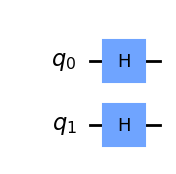

In [6]:
grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw('mpl')


[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


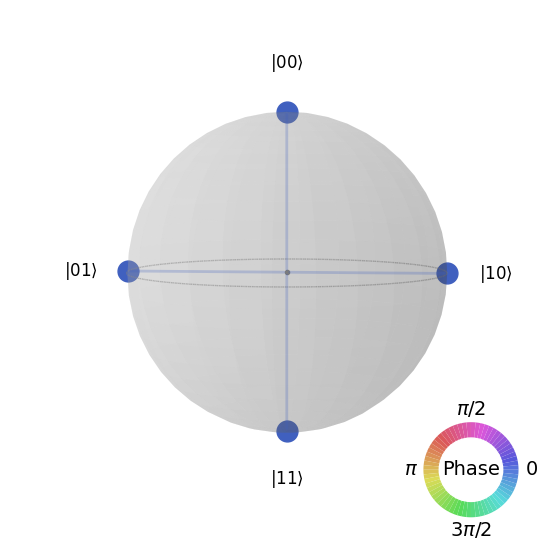

In [7]:
state_vector=Zustandsvektor(grover_circuit)
plot_state_qsphere(state_vector)

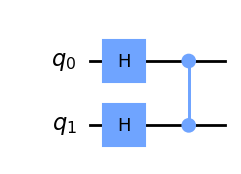

In [8]:
# Orakel
grover_circuit.cz(0,1)
grover_circuit.draw('mpl')

[ 0.5+0.000000e+00j  0.5-6.123234e-17j  0.5+0.000000e+00j
 -0.5+6.123234e-17j]


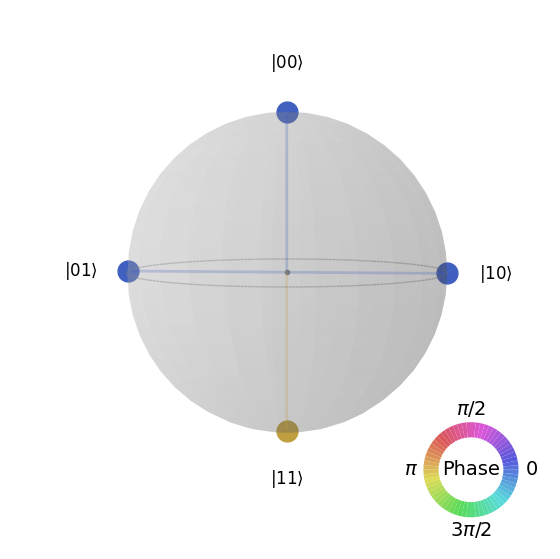

In [9]:
state_vector=Zustandsvektor(grover_circuit)
plot_state_qsphere(state_vector)

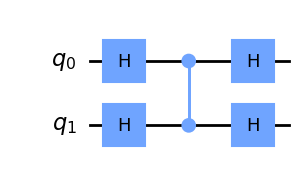

In [10]:
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

[ 0.5+0.000000e+00j  0.5+0.000000e+00j  0.5-6.123234e-17j
 -0.5+6.123234e-17j]


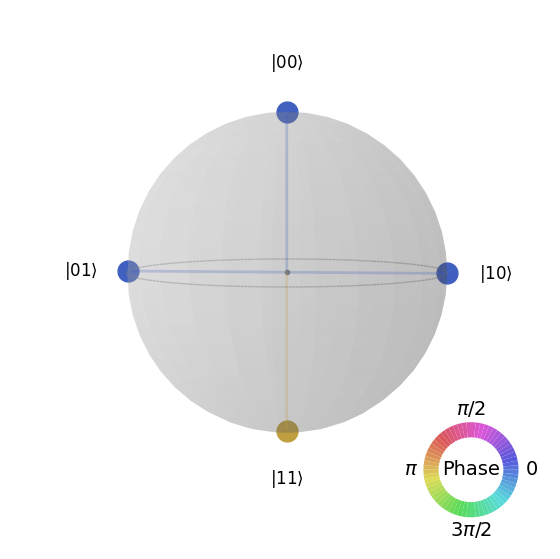

In [11]:
state_vector=Zustandsvektor(grover_circuit)
plot_state_qsphere(state_vector)

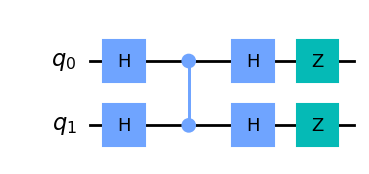

In [12]:
# Diffusion operator (U_s)
grover_circuit.z([0,1])
grover_circuit.draw('mpl')

[ 0.5+0.0000000e+00j -0.5-6.1232340e-17j -0.5-1.2246468e-16j
 -0.5-1.8369702e-16j]


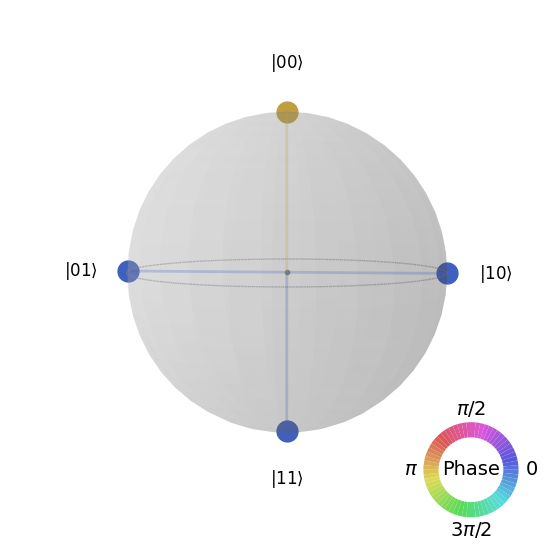

In [13]:
state_vector=Zustandsvektor(grover_circuit)
plot_state_qsphere(state_vector)

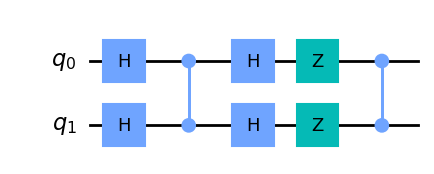

In [14]:
grover_circuit.cz(0,1)
grover_circuit.draw('mpl')

[ 0.5-6.12323400e-17j -0.5+0.00000000e+00j -0.5+2.22044605e-16j
  0.5-1.60812265e-16j]


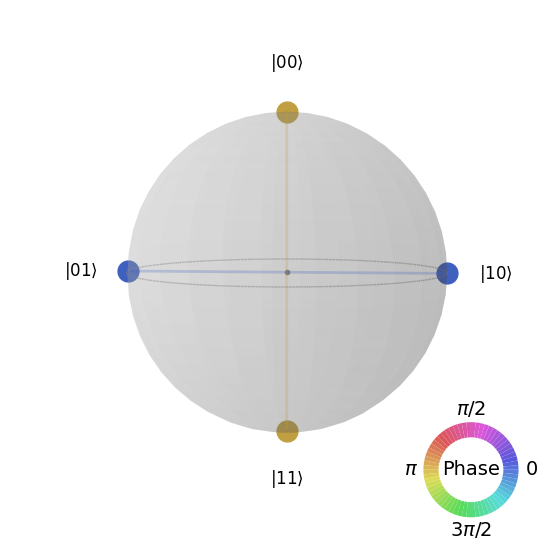

In [15]:
state_vector=Zustandsvektor(grover_circuit)
plot_state_qsphere(state_vector)

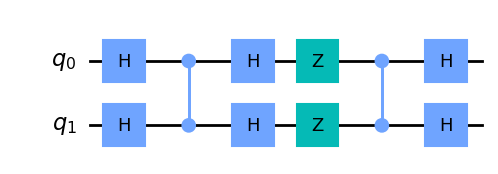

In [16]:
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

[0.+0.00000000e+00j 0.+0.00000000e+00j 0.+0.00000000e+00j
 1.-1.60812265e-16j]


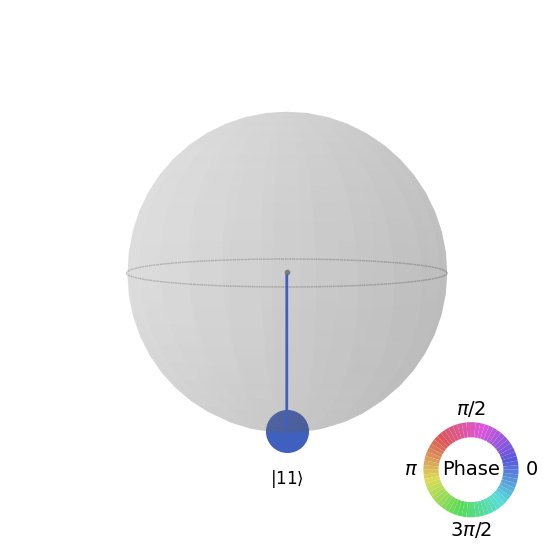

In [17]:
state_vector=Zustandsvektor(grover_circuit)
plot_state_qsphere(state_vector)

In [18]:
grover_circuit.measure_all()
Histogramm(grover_circuit)
#backend = BasicAer.get_backend('qasm_simulator')
#job=execute(grover_circuit, backend, shots=1000)
#result = job.result()
#counts = result.get_counts()
#plot_histogram(counts)

### Schrittweise Analyse

#### 1. Nach der Initialisierung

$\left|\psi_0\right\rangle=\mathcal{H}^{\otimes 2}\left|00\right\rangle=\left|s\right\rangle=\frac{1}{2}(\left|00\right\rangle+\left|01\right\rangle+\left|10\right\rangle+\left|11\right\rangle)$

haben wir $\left|w\right\rangle = \left|11\right\rangle$ und $\left|s'\right\rangle = \left|00\right\rangle+\left|01\right\rangle+\left|10\right\rangle$ wobei offensichtlich $\left|w\right\rangle \bot\left|s'\right\rangle$ gilt, weil alle Basisvektoren von $\left|s\right\rangle$ orthogonal zueinander stehen.

Demnach ist $\left|s'\right\rangle$ ein dreidimensionaler Unterraum des Vierdimensionalen Zustandsraums der beiden Qubits. Der Zustand $\left|11\right\rangle$ ragt dann bereits in die vierte Dimension, die wir uns anschaulich nicht mehr vorstellen können. Dennoch können wir formal den Winkel $\theta$ zwischen $\left|s\right\rangle$ und $\left|s'\right\rangle$ berechnen. Gemäass den Ausführungen von weiter oben gilt für den Fall $N=4$:

Mit $\theta = \arcsin \langle s | w \rangle = \arcsin \frac{1}{\sqrt{N}}=\arcsin \frac{1}{\sqrt{4}}=\arcsin \frac{1}{2}=\pi/6=30°$



#### 2. Anwendung des Phasenorakels $U_f$

Die Spiegelung an $\left|s'\right\rangle$ erreichen wir einfach durch Phasenumkehr von $\left|11\right\rangle$ zu $-\left|11\right\rangle$. Dies haben wir im Beispiel oben durch das `.cz`-Gatter erreicht. Das Register befindet sich jetzt im Zustand $\left|\psi_1\right\rangle$. 

#### 3. Anwendung des Diffusionsoperators $U_s$

Danach erfolgt die Spiegelung an $\left|s\right\rangle$. Formal kann man diese Spiegelung als $U_s = 2|s\rangle\langle s| - \mathbb{1}$ schreiben. In unserem Beispiel haben wir diese Operation durch eine Folge von Gattern umgesetzt: $$\mathcal{H}^{\otimes 2}\mathcal{C_Z}\mathcal{Z}^{\otimes 2}\mathcal{H}^{\otimes 2}.$$

Was bedeutet diese Konstruktion? Spiegeln an $\left|s\right\rangle$ bedeutet auch eine Umkehr aller Phasen, die orthogonal zu $\left|s\right\rangle$ stehen. Wie erreicht man das?
Hier kommen die beiden $\mathcal{H}^{\otimes 2}$-Operationen zum Zug. Die erste Anwendung hat die Wirkung $\mathcal{H}^{\otimes 2}\left|s\right\rangle=\left|00\right\rangle$, weil $\left|s\right\rangle$ zu Beginn durch $\mathcal{H}^{\otimes 2}$ aus $\left|00\right\rangle$ hervor ging und die zweifache Anwendung diese Operation wieder Rückgängig macht. 

Nach der ersten Anwendung von $\mathcal{H}^{\otimes 2}$ muss man also nur die Phasen (Vorzeichen) aller Komponenten ausser von $\left|00\right\rangle$ umdrehen. Dies wird durch $U_0=\mathcal{C_Z}\mathcal{Z}^{\otimes 2}$ erreicht. Anschliessend wird durch die zweite Anwendung von $\mathcal{H}^{\otimes 2}$ die Anordnung wieder zurückgedreht.

Diese Operation entspricht schliesslich einer Spiegelung an $\left|s\right\rangle$  und somit einer Weiterdrehung von $\left|s\right\rangle$ um $60°$ nach links. Da $\left|s\right\rangle$ bereits im Winkel von $30°$ zu $\left|s'\right\rangle$ stand, befindet sich das Register bereits nach einer Iteration im gesuchten Zustand $\left|w\right\rangle$ und die Suche ist damit bereits beendet.

Weitere Beispiele und Erläuterungen finden Sie im [Qiskit Textbook](https://github.com/Qiskit/textbook/blob/main/notebooks/ch-algorithms/grover.ipynb). In diesem GitHub-Repository finden Sie übrigens viele weitere Quantenalgorithmen aus erster Hand beschrieben, allerdings alles in englischer Sprache.